# AutoML - PyCaret

## Author: 
- Yash Pankhania (pankhania.y@northeastern.edu)

Github Repository URL: https://github.com/Draconian10/Australia_Weather_Prediction

## Abstract
This assignment focuses on using an AutoML library, Pycaret, to develop predictive models and interpret them. The primary objective is to identify meaningful relationships using different algorithms and create multivariate models. The analysis is conducted on Australian weather data, and the goal is to predict whether it will rain tomorrow or not. The use of AutoML tools simplifies the process of developing models and enables efficient exploration of various algorithm options. Ultimately, the analysis will provide insights into the underlying patterns in the weather data and enable accurate predictions for future periods.

## PyCaret Library
PyCaret is an open-source, low-code machine learning library in Python that provides a range of tools for simplifying the machine learning workflow. It is designed to be easy to use for both beginners and experienced data scientists.

PyCaret provides a range of functions that enable users to perform various tasks in the machine learning pipeline, such as data preparation, modeling, hyperparameter tuning, and deployment. It supports a wide range of machine learning algorithms, including linear regression, logistic regression, decision tree, random forest, gradient boosting, and more.

Overall, PyCaret is a powerful tool for simplifying the machine learning workflow and making it more accessible to a wider range of users.

Refer: https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d

In [365]:
# Installing Pycaret Library
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [366]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [367]:
# Reading data from the CSV file and inserting it into a DataFrame
train_df = pd.read_csv('https://raw.githubusercontent.com/Draconian10/Australia_Weather_Prediction/main/Data_Cleaning_Feature_Selection/Weather%20Training%20Data.csv')

In [368]:
# Displaying data in the DataFrame
train_df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [369]:
# Fetching number of rows and columns
train_df.shape

(99516, 23)

In [370]:
# Fetching data types of each individual columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [371]:
# Fetching unique values in each column
train_df.nunique()

row ID           99516
Location            49
MinTemp            386
MaxTemp            500
Rainfall           601
Evaporation        327
Sunshine           145
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        43
WindSpeed3pm        44
Humidity9am        101
Humidity3pm        101
Pressure9am        536
Pressure3pm        536
Cloud9am            10
Cloud3pm            10
Temp9am            432
Temp3pm            491
RainToday            2
RainTomorrow         2
dtype: int64

In [372]:
# Fetching a descriptive statistics summary of the DataFrame
train_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [373]:
# Dropping unwanted columns from the DataFrame
train_df.drop(columns='row ID', inplace=True)
train_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [374]:
# Searching for NULL values in the DataFrame
train_df.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [375]:
# Replacing the string value 'NA' with NaN in the DataFrame
train_df['RainToday'] = train_df['RainToday'].replace('NA', np.nan)

In [376]:
# Displaying data in the DataFrame
train_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


## Imputing categorical values with Mode

In [377]:
# Replacing Null Categorical values with the mode of that column
for i in train_df[['Location', 'WindGustDir', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)

In [378]:
# Searching for NULL values in the DataFrame
train_df.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir          0
WindGustSpeed     6480
WindDir9am           0
WindDir3pm           0
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday            0
RainTomorrow         0
dtype: int64

In [379]:
train_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


## Imputating Numeric Variables with MICE Imputation

## MICE Imputation
MICE (Multiple Imputation by Chained Equations) is a popular imputation method used to handle missing values in a dataset. It is a flexible and robust imputation method that can handle different types of missing data, such as missing completely at random (MCAR), missing at random (MAR), and missing not at random (MNAR).

In [380]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # Library is required to perform Multivariate Imputation by Chained Equations (MICE) Imputation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [381]:
# Splitting the DataFrame into Numeric and Categorical DataFrames
categorical_col = train_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]
numeric_col = train_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]

In [382]:
# Displaying categorical data in the DataFrame
categorical_col.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,W,ENE,NW,No
3,Albury,WNW,W,W,No
4,Albury,W,SSE,W,No


In [383]:
# Displaying numeric data in the DataFrame
numeric_col.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
3,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0
4,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0


In [384]:
# Using MICE to impute missing values
imputer = IterativeImputer(random_state=0, n_nearest_features=3)
imputed_numeric_col = pd.DataFrame(imputer.fit_transform(numeric_col), columns = numeric_col.columns)

In [385]:
# Searching for NULL values in the DataFrame
imputed_numeric_col.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

In [386]:
# Concatenating the encoded DataFrame with the main DataFrame
concat_train_df = pd.concat([imputed_numeric_col, categorical_col], axis=1)

In [387]:
# Displaying data in the DataFrame
concat_train_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.4,22.9,0.6,7.634850,7.951930,44.0,20.0,24.0,71.0,22.0,...,8.000000,6.416307,16.9,21.8,0.0,Albury,W,W,WNW,No
1,7.4,25.1,0.0,5.765819,10.303316,44.0,4.0,22.0,44.0,25.0,...,2.482751,3.121249,17.2,24.3,0.0,Albury,WNW,NNW,WSW,No
2,17.5,32.3,1.0,8.104519,5.979908,41.0,7.0,20.0,82.0,33.0,...,7.000000,8.000000,17.8,29.7,0.0,Albury,W,ENE,NW,No
3,14.6,29.7,0.2,8.220281,10.379909,56.0,19.0,24.0,55.0,23.0,...,2.403320,3.232408,20.6,28.9,0.0,Albury,WNW,W,W,No
4,7.7,26.7,0.0,6.363272,10.798302,35.0,6.0,17.0,48.0,19.0,...,2.101078,2.974320,16.3,25.5,0.0,Albury,W,SSE,W,No


## Data Visualization

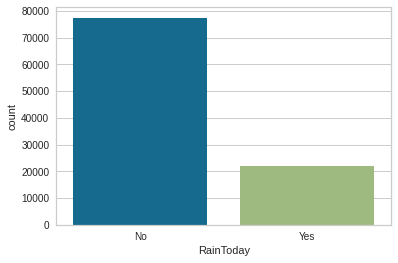

In [388]:
# Creating a count plot of the 'RainToday' variable in the concatenated training data
sns.countplot(concat_train_df['RainToday']);

This plot shows the total count of whether Rain occurs Today or not. 77460 records portray that there will be no rain whereas, 22056 records show that there will be rain today.

<AxesSubplot:>

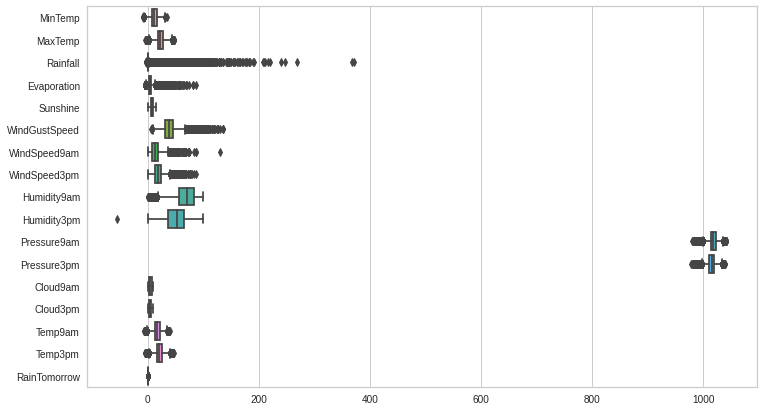

In [389]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(12,7))
sns.boxplot(data = concat_train_df, orient = 'h')

In [390]:
# Generating correlation of data set
concat_train_df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.737805,0.103456,0.559797,0.067918,0.182570,0.177278,0.172993,-0.240116,-0.002399,-0.467827,-0.478364,0.035622,-0.004931,0.900362,0.713479,0.083738
MaxTemp,0.737805,1.000000,-0.074137,0.680712,0.474664,0.078717,0.018177,0.050155,-0.507089,-0.510173,-0.359216,-0.447769,-0.351545,-0.314628,0.884234,0.982171,-0.159770
Rainfall,0.103456,-0.074137,1.000000,-0.066306,-0.233930,0.127362,0.087870,0.061920,0.220707,0.254335,-0.157038,-0.117709,0.206324,0.187816,0.011588,-0.079029,0.237910
Evaporation,0.559797,0.680712,-0.066306,1.000000,0.411149,0.187204,0.173661,0.127901,-0.534748,-0.480331,-0.302221,-0.331590,-0.292541,-0.269396,0.633619,0.675086,-0.147919
Sunshine,0.067918,0.474664,-0.233930,0.411149,1.000000,-0.013021,0.005513,0.030883,-0.533835,-0.720799,0.009368,-0.050799,-0.727965,-0.766399,0.280834,0.505326,-0.432715
WindGustSpeed,0.182570,0.078717,0.127362,0.187204,-0.013021,1.000000,0.583970,0.663915,-0.221952,-0.030222,-0.462233,-0.421757,0.046454,0.066954,0.159375,0.040499,0.228009
WindSpeed9am,0.177278,0.018177,0.087870,0.173661,0.005513,0.583970,1.000000,0.522770,-0.275425,-0.031341,-0.226088,-0.177975,0.022189,0.028564,0.132043,0.005051,0.090663
WindSpeed3pm,0.172993,0.050155,0.061920,0.127901,0.030883,0.663915,0.522770,1.000000,-0.148285,0.015301,-0.302781,-0.266145,0.041343,0.013376,0.162384,0.026257,0.088222
Humidity9am,-0.240116,-0.507089,0.220707,-0.534748,-0.533835,-0.221952,-0.275425,-0.148285,1.000000,0.665017,0.157659,0.203193,0.473101,0.405483,-0.476130,-0.499667,0.255380
Humidity3pm,-0.002399,-0.510173,0.254335,-0.480331,-0.720799,-0.030222,-0.031341,0.015301,0.665017,1.000000,0.000972,0.076971,0.606228,0.558402,-0.227661,-0.560079,0.444524


<AxesSubplot:>

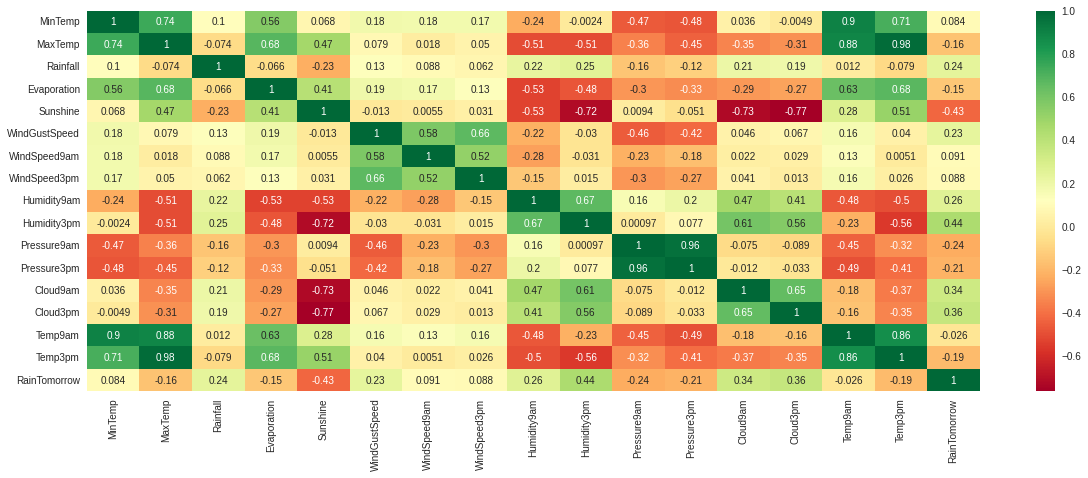

In [391]:
# Plotting Heat Map to check correlation for the data set
plt.figure(figsize=(20,7))
sns.heatmap(concat_train_df.corr(), annot=True, cmap='RdYlGn')

We can see that lots of variables have high correlation upon other predictor variables. The highest correlation observed is between Temp3pm and MaxTemp which shows presence of multicollinearity.

# Train Test Split

Test train split is a common technique used in machine learning to evaluate the performance of a model. It involves dividing a dataset into two separate sets: a training set and a test set.

The training set is used to train the machine learning model, and the test set is used to evaluate the model's performance on new, unseen data. By using a separate test set, the performance of the model can be more accurately assessed, as it has not been trained on this data.

In [392]:
from sklearn.model_selection import train_test_split # Library is required to split the data set into training set and test set

In [393]:
# Splitting the Data set into 80% Training set and 20% Test set
final_train_df, final_test_df = train_test_split(concat_train_df, test_size=0.2, random_state=0)

In [394]:
# Fetching number of rows and columns for training set
final_train_df.shape

(79612, 22)

In [395]:
# Fetching number of rows and columns for test set
final_test_df.shape

(19904, 22)

In [396]:
 !pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.56.4-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.39.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


# Binary Classification

In [397]:
# Importing PyCaret's classification module
from pycaret.classification import *

## Setup Function

- The setup function in PyCaret initializes the environment and creates the transformation pipeline for modeling and deployment. setup must be called before executing any other function in pycaret.
- It takes two mandatory parameters: a pandas dataframe and the name of the target column. 
- All other parameters are optional can be used to customize the preprocessing pipeline.

In [398]:
# Setting up the PyCaret environment for classification modeling
clf = setup(data = final_train_df,  # Fetching data set to be used for modeling
            target = 'RainTomorrow',  # Selecting target variable we want to predict
            categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],  # Listing out categorical features in the data
            normalize=True,  # Normalizing the numerical features in the data
            feature_selection = True,  # Performing feature selection on the data set
            feature_selection_threshold=0.50,  # Setting threshold for feature selection (keep features with importance greater than this value)
            remove_multicollinearity = True,  # Removing multicollinearity between features
            multicollinearity_threshold = 0.8,  # Setting threshold for detecting multicollinearity (features with correlation greater than this value will be removed)
            silent = True)  # Displaying information about the setup process


,Description,Value
0,session_id,410
1,Target,RainTomorrow
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(79612, 22)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Location',
                                                            'WindGustDir',
                                                            'WindDir9am',
                                                            'WindDir3pm',
                                                            'RainToday'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='RainTomorrow',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_avai

In [399]:
# Displaying the Pycaret environment created using the Data Set
clf

('lightgbm', False, 84426    0
 82415    0
 19877    0
 2629     1
 98010    0
         ..
 21243    1
 45891    0
 42613    0
 43567    0
 68268    0
 Name: RainTomorrow, Length: 79612, dtype: int64, -1, Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False), '49b8', {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x7fb3885fd940>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x7fb3885fdd90>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x7fb3880dbd60>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fb3880db460>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x7fb3880db4f0>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x7fb3880db5b0>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x7fb3880db9d0>,
  '

## Best Model (Compare_Model Function)
- Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). 
- This function trains all models in the model library and scores them using stratified cross-validation for metric evaluation. 
- The output prints a scoring grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC across the folds (10 by default) along with training times.

In [400]:
# Comparing different machine learning models
compare_models(exclude=['knn', 'gbc', 'et', 'rf'], sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8539,0.8805,0.5491,0.7363,0.6290,0.5404,0.5495,17.253
lightgbm,Light Gradient Boosting Machine,0.8539,0.8812,0.5343,0.7463,0.6227,0.5352,0.5467,1.235
lr,Logistic Regression,0.8455,0.8680,0.5135,0.7216,0.5998,0.5075,0.5188,3.305
lda,Linear Discriminant Analysis,0.8441,0.8660,0.5293,0.7062,0.6050,0.5103,0.5186,0.977
ridge,Ridge Classifier,0.8431,0.0000,0.4643,0.7443,0.5717,0.4819,0.5021,0.079
ada,Ada Boost Classifier,0.8419,0.8622,0.5066,0.7098,0.5911,0.4964,0.5074,3.570
svm,SVM - Linear Kernel,0.8414,0.0000,0.4659,0.7386,0.5689,0.4781,0.4985,0.542
dt,Decision Tree Classifier,0.7810,0.6904,0.5253,0.5146,0.5198,0.3781,0.3781,1.257
dummy,Dummy Classifier,0.7744,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041
nb,Naive Bayes,0.6647,0.7559,0.7334,0.3757,0.4968,0.2828,0.3184,0.177


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 2
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
INFO:logs:compare_models() succesfully completed......................................


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

Excluded KNN Classifier, Gradient Boosting Classifier, Extra Trees Classifier and Gradient Boosting Classifier were excluded from the compare_model function because their turnaround time was over 10 seconds with no significant change in accuracy since they're not good for large data sets.

## Create_Model Function
- Create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. 
- As the name suggests this function trains and evaluates a model using cross-validation that can be set with fold parameter. 
- The output prints a scoring grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold.

In [401]:
# Creating a LightGBM model for the data
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.8800,0.5179,0.7389,0.6090,0.5197,0.5323
1,0.8561,0.8814,0.5402,0.7519,0.6287,0.5424,0.5538
2,0.8502,0.8787,0.5235,0.7360,0.6118,0.5222,0.5339
3,0.8534,0.8768,0.5286,0.7480,0.6195,0.5320,0.5443
4,0.8516,0.8804,0.5533,0.7242,0.6273,0.5367,0.5443
5,0.8565,0.8805,0.5374,0.7562,0.6283,0.5424,0.5546
6,0.8527,0.8815,0.5342,0.7409,0.6208,0.5323,0.5433
7,0.8573,0.8916,0.5390,0.7592,0.6304,0.5452,0.5574
8,0.8591,0.8804,0.5394,0.7670,0.6333,0.5494,0.5625


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


## Hyperparameter Tuning
- Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning algorithm to achieve the best possible performance.
- When a model is created using the create_model function it uses the default hyperparameters to train the model. 
- In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using random grid search on a pre-defined search space. 
- The output prints a scoring grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model.

In [402]:
# Tuning the LightGBM model to choose a set of optimal hyperparameters
tuned_lightgbm = tune_model(lightgbm, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8520,0.8786,0.5211,0.7460,0.6136,0.5256,0.5385
1,0.8541,0.8799,0.5282,0.7511,0.6203,0.5334,0.5460
2,0.8450,0.8754,0.5044,0.7246,0.5947,0.5027,0.5153
3,0.8565,0.8747,0.5390,0.7550,0.6289,0.5430,0.5549
4,0.8530,0.8798,0.5453,0.7353,0.6262,0.5372,0.5465
5,0.8543,0.8783,0.5397,0.7445,0.6258,0.5382,0.5489
6,0.8520,0.8810,0.5358,0.7366,0.6203,0.5312,0.5416
7,0.8577,0.8896,0.5358,0.7633,0.6296,0.5449,0.5579
8,0.8602,0.8800,0.5394,0.7722,0.6351,0.5520,0.5656


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


## SHAP Summary

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations).

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


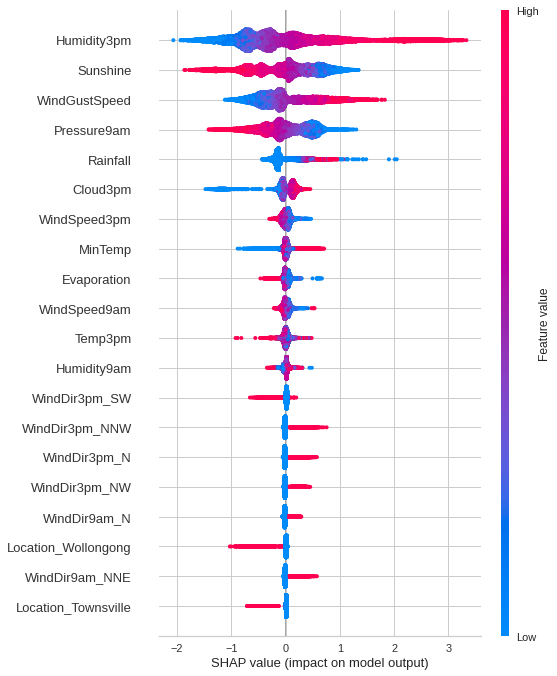

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [403]:
# Interpreting the model using SHAP
interpret_model(lightgbm)

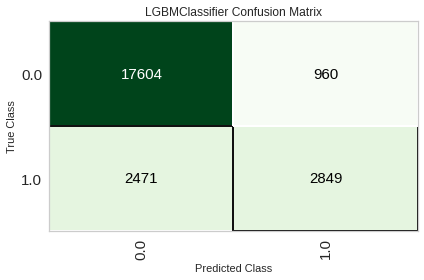

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [404]:
# Plotting a confusion matrix for the tuned LightGBM model
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

A confusion matrix is a table that is used to evaluate the performance of a machine learning algorithm by comparing the predicted output of the algorithm with the actual output. The matrix displays the number of true positives, true negatives, false positives, and false negatives that were produced by the algorithm.
The model has pretty high accuracy with 17496 TP, 1020 FP, 2535 FN and 2833 TN.



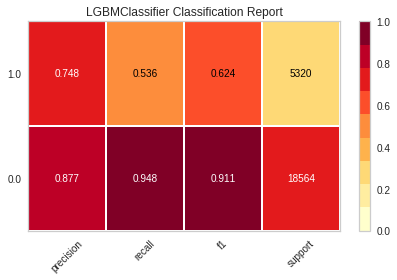

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [405]:
# Plotting a classification report for the tuned LightGBM model
plot_model(tuned_lightgbm, plot = 'class_report')

## AUC Plot
- The AUC plot is a graphical representation of the Receiver Operating Characteristic (ROC) curve, which is a commonly used metric to evaluate the performance of a binary classification model. 
- The AUC (Area Under the Curve) is a single number that represents the overall performance of the model, with a value of 1.0 indicating a perfect model and 0.5 indicating a model that performs no better than random.
- The AUC plot in PyCaret shows the ROC curve of the model, which is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values.

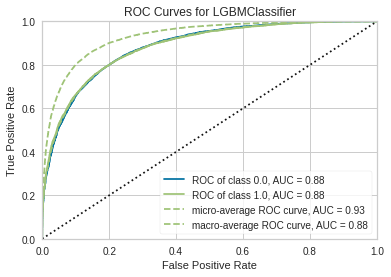

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [406]:
plot_model(tuned_lightgbm, plot='auc')

Based on the AUC plot shown above, it is evident that the ROC curve is positioned towards the Top Positive Rate. The AUC score, which ranges from 0.88 to 0.93, indicates that the model is able to effectively differentiate between the positive and negative classes, and thus performing well in this regard.

## Feature Importance Plot

The feature importance plot in Pycaret is a graphical representation of the relative importance of the features in a trained machine learning model. It displays the importance scores of each feature in descending order. The higher the score, the more important the feature is in making predictions.

Pycaret calculates feature importance scores using the permutation feature importance method, which works by shuffling the values of each feature and measuring the effect on the model's performance. Features that have a greater impact on the model's performance when their values are shuffled have higher importance scores.

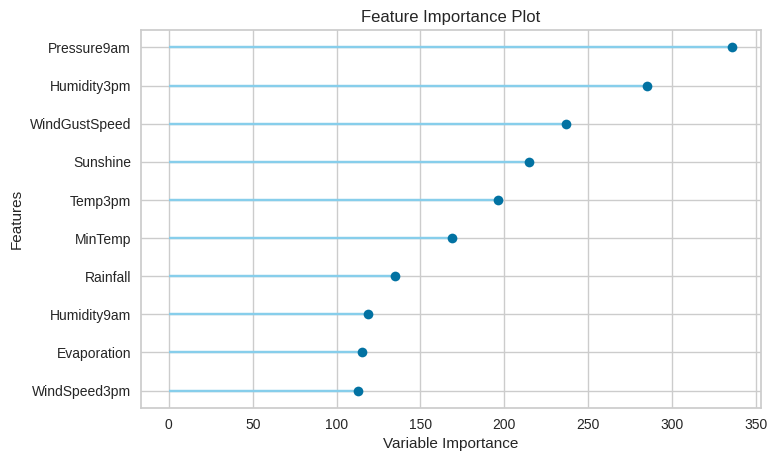

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [407]:
# Plotting feature importance for the tuned LightGBM model
plot_model(tuned_lightgbm, plot='feature')

## Evaluate_Model Function
- Another alternative to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. 
- It internally uses the plot_model() function.

In [408]:
# Evaluating the tuned LightGBM model on the hold-out test set
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict_Model Function
- Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. 
- Using our final trained model stored in the tuned_rf we will predict the test / hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [409]:
# Generating predictions on the hold-out test set
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8563,0.8842,0.5355,0.748,0.6242,0.5384,0.5498


,Location_Dartmoor,Location_PearceRAAF,WindDir3pm_N,Location_Williamtown,WindDir3pm_SSE,WindDir3pm_S,WindGustDir_N,MinTemp,WindDir3pm_SE,WindDir9am_NE,...,Location_NorfolkIsland,Humidity9am,Location_Launceston,WindDir3pm_NE,Location_SydneyAirport,WindDir3pm_ENE,Location_Hobart,RainTomorrow,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.673258,0.0,0.0,...,0.0,-0.155900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9641
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.296862,0.0,0.0,...,0.0,0.529082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9847
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.510424,0.0,0.0,...,0.0,0.002173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9519
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.293140,0.0,0.0,...,0.0,0.687155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9783
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.318504,0.0,0.0,...,0.0,-1.157028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.055612,0.0,0.0,...,0.0,-0.840882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9362
23880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.167674,0.0,0.0,...,0.0,-0.735500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8615
23881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.904783,0.0,0.0,...,0.0,1.477519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9331
23882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.255771,0.0,0.0,...,0.0,-0.630119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8020


## Finalize_Model Function
- Model finalization is the last step in the experiment. 
- The finalize_model function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). 
- The purpose of this function is to train the final model on the complete dataset before it is deployed in production. (This is optional, you may or may not use finalize_model).

In [410]:
# Finalizing the tuned LightGBM model
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               rando

## Predict_Model Function
- The predict_model function is also used to predict on the unseen dataset.
- The Label and Score columns are added onto the data_unseen set. 
- The label is the prediction and the score is the probability of the prediction.

In [411]:
# Generating predictions on the hold-out test set
predict_model(final_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8679,0.9067,0.5664,0.7806,0.6564,0.5772,0.5886


,Location_Dartmoor,Location_PearceRAAF,WindDir3pm_N,Location_Williamtown,WindDir3pm_SSE,WindDir3pm_S,WindGustDir_N,MinTemp,WindDir3pm_SE,WindDir9am_NE,...,Location_NorfolkIsland,Humidity9am,Location_Launceston,WindDir3pm_NE,Location_SydneyAirport,WindDir3pm_ENE,Location_Hobart,RainTomorrow,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.673258,0.0,0.0,...,0.0,-0.155900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9753
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.296862,0.0,0.0,...,0.0,0.529082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9871
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.510424,0.0,0.0,...,0.0,0.002173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9581
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.293140,0.0,0.0,...,0.0,0.687155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9617
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.318504,0.0,0.0,...,0.0,-1.157028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.055612,0.0,0.0,...,0.0,-0.840882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9525
23880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.167674,0.0,0.0,...,0.0,-0.735500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8490
23881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.904783,0.0,0.0,...,0.0,1.477519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9136
23882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.255771,0.0,0.0,...,0.0,-0.630119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8575


In [412]:
# Generating final predictions on the test set
final_pred = predict_model(final_lightgbm, data = final_test_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8571,0.8855,0.5399,0.7531,0.6289,0.5434,0.5549


Therefore, the accuracy of the LightGBM model for predicted values comes around to approximately 0.8614 which changes each time due to random data selection. We have performed feature selection and hyperparameter tuning to prevent overfitting.

In [413]:
# Displaying data in the DataFrame
final_pred.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainTomorrow,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Label,Score
37152,12.1,23.3,0.0,7.591658,10.817403,48.0,15.0,17.0,29.0,21.0,...,13.5,22.4,0.0,MountGinini,W,W,WNW,No,0.0,0.9719
7886,10.0,20.3,0.0,5.162500,8.595501,31.0,15.0,15.0,47.0,42.0,...,17.3,18.8,0.0,CoffsHarbour,SW,SW,ESE,No,0.0,0.9582
24902,12.3,21.4,0.0,4.200000,9.700000,30.0,13.0,24.0,45.0,52.0,...,17.2,18.5,0.0,SydneyAirport,ENE,W,ENE,No,0.0,0.9548
58354,15.1,26.2,0.0,3.000000,3.500000,20.0,2.0,6.0,84.0,75.0,...,19.2,22.3,0.0,Brisbane,NNW,NW,N,No,0.0,0.5027
45814,4.4,10.2,2.6,2.200000,1.000000,57.0,24.0,30.0,72.0,60.0,...,6.4,9.3,0.0,MelbourneAirport,N,N,N,Yes,1.0,0.5739


## Regularization

Regularization is a technique used to prevent overfitting in a model by adding a penalty term to the loss function that the model tries to minimize during training.

Regularization works by adding a regularization term to the loss function that penalizes large parameter values. There are two common types of regularization techniques used in machine learning:

1. L1 regularization, also known as Lasso regularization, adds a penalty term proportional to the absolute value of the model's weights. This penalty encourages the model to learn sparse feature weights and can be used for feature selection.

2. L2 regularization, also known as Ridge regularization, adds a penalty term proportional to the square of the model's weights. This penalty encourages the model to learn small weights and can be used to reduce the impact of irrelevant features.


### Ridge Regularization

In [414]:
# Create LightGBM model with Ridge regularization
ridge_model = create_model('lightgbm', fold=5, n_estimators=100, learning_rate=0.1, reg_alpha=0.5)
final_ridge = finalize_model(ridge_model)
ridge_pred = predict_model(final_ridge, data = final_test_df)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8524,0.8804,0.5284,0.7433,0.6177,0.5295,0.5413
1,0.8499,0.8769,0.5237,0.7349,0.6116,0.5218,0.5333
2,0.8547,0.8810,0.5487,0.7399,0.6301,0.5422,0.5515
3,0.8537,0.8869,0.5340,0.7457,0.6223,0.5347,0.5462
4,0.8572,0.8818,0.5419,0.7564,0.6315,0.5459,0.5576
Mean,0.8536,0.8814,0.5353,0.7440,0.6226,0.5348,0.5460
Std,0.0024,0.0032,0.0090,0.0071,0.0075,0.0087,0.0083


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.5, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8585,0.8852,0.5466,0.755,0.6341,0.5492,0.5602


### Lasso Regularization

In [415]:
# Create LightGBM model with Lasso regularization
lasso_model = create_model('lightgbm', fold=5, n_estimators=100, learning_rate=0.1, reg_lambda=0.5)
final_lasso = finalize_model(lasso_model)
lasso_pred = predict_model(final_ridge, data = final_test_df)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8520,0.8808,0.5276,0.7418,0.6166,0.5281,0.5399
1,0.8520,0.8776,0.5328,0.7383,0.6189,0.5300,0.5409
2,0.8546,0.8810,0.5507,0.7383,0.6308,0.5427,0.5517
3,0.8526,0.8866,0.5356,0.7393,0.6212,0.5325,0.5432
4,0.8561,0.8819,0.5419,0.7510,0.6296,0.5431,0.5543
Mean,0.8534,0.8816,0.5377,0.7417,0.6234,0.5353,0.5460
Std,0.0016,0.0029,0.0080,0.0048,0.0057,0.0064,0.0059


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 10
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=410, reg_alpha=0.0, reg_lambda=0.5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100,

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8585,0.8852,0.5466,0.755,0.6341,0.5492,0.5602


In [416]:
from sklearn.metrics import accuracy_score
print('Final Prediction Accuracy:', round(accuracy_score(final_pred['RainTomorrow'].astype(float), final_pred['Label'].astype(float)),4))
print('Ridge Regularized Model Accuracy:', round(accuracy_score(ridge_pred['RainTomorrow'].astype(float), ridge_pred['Label'].astype(float)),4))
print('Lasso Regularized Model Accuracy:', round(accuracy_score(lasso_pred['RainTomorrow'].astype(float), lasso_pred['Label'].astype(float)),4))

Final Prediction Accuracy: 0.8571
Ridge Regularized Model Accuracy: 0.8585
Lasso Regularized Model Accuracy: 0.8585


The original model accuracy did not improve significantly after performing ridge and lasso regularization. Therefore, ridge and lasso regularization are not useful for working on LightGBM model on Australian weather data set.

## Questions:

### 1. Is the relationship significant?

As per the <a href = 'https://colab.research.google.com/drive/1RbHIWiPt2D-0SkPgrd2-LNgFEaCe33oh#scrollTo=1yQFeEWwGoFN&line=1&uniqifier=1'> Heat Map</a>, we can observe that variables like MinTemp, MaxTemp and Temp9am have positive correlation with the correlation values as high as 0.98 whereas variables like Sunshine, Pressure9am and Pressure3pm have strong negative correlation. Therefore, there is a significant relationship between the predictor variables.

### 2. Are any model assumptions violated?
The model assumptions for classification models are as follows:

#### Assumption 1: The Response Variable is Binary
The predicted variable 'RainTomorrow' is binary and generates predictions as 0 or 1

#### Assumption 2: The Observations are Independent
No, the observations are not independent since the Training and Test sets have been generated by splitting the main Data set in 80-20 distribution. Therefore, both of them follow the same trends and data distribution.

#### Assumption 3: There is No Multicollinearity Among Explanatory Variables
No, the predictor variables are not independent of other predictor variables. There is high multicollinearity among multiple variables with the correlation values as high as 0.98.

#### Assumption 4: There are No Extreme Outliers
- After conducting a comparison of the accuracy of predictions between data sets containing outliers and those without outliers, we observed that removing the outliers resulted in decreased test and train scores. 
- This suggests that the outliers may have contained valuable information that is crucial for making accurate predictions. 
- Thus, removing them may cause the model to miss out on this critical information, ultimately leading to decreased prediction accuracy.


### Assumption 5: The Sample Size is Sufficiently Large
The sample size is sufficiently large consisting 79612 records in the training set.

Refer: https://www.statology.org/assumptions-of-logistic-regression/

### 3. Is there any multicollinearity in the model?

- We can note that variables such as MinTemp, MaxTemp, and Temp9am display a positive correlation with correlation values as high as 0.98, while variables such as Sunshine, Pressure9am, and Pressure3pm exhibit a strong negative correlation. 
- This suggests that the predictor variables are not independent of one another, and there is a significant degree of multicollinearity between multiple variables, with correlation values reaching as high as 0.98.

### 4. In the multivariate models are predictor variables independent of all the other predictor variables?

No, there exists a significant degree of multicollinearity among multiple predictor variables, with correlation values of around 0.98, indicating that these predictor variables are not independent of one another.

### 5. In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

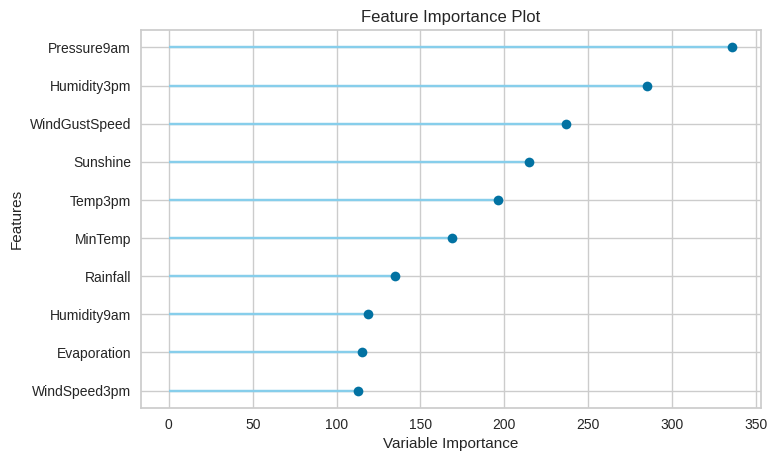

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [417]:
# Plotting feature importance for the tuned LightGBM model
plot_model(tuned_lightgbm, plot='feature')

The predictor variables that are most important for predicting the target variables are ranked in priority as follows:
1. MinTemp
2. Pressure9am
3. Sunshine
4. Temp3pm
5. Evaporation
6. WindGustSpeed
7. Humidity9am
8. Humidity3pm
9. Cloud3pm
10. Rainfall

We have excluded insignificant variables like 'row ID' since they had no significant impact upon the predictor variables.

### 6. Does the model make sense?
- When using LightGBM for binary classification, it is trained to predict the probability of a binary outcome based on a set of input features.
- The decision trees built by LightGBM are designed to be shallow and wide, which means they have fewer levels but more leaves than traditional decision trees. 
- This approach allows LightGBM to make predictions more quickly and accurately by reducing overfitting and improving generalization.
- Overall, the LightGBM model is well-suited for binary classification tasks because it can handle large datasets with many features, is computationally efficient, and produces accurate predictions even in the presence of noisy or missing data.

### 7. Does regularization help?
Ridge and Lasso regularization did not significantly improve the accuracy of the LightGBM model. Other parameters like AUC, Precision and Recall also did not significantly change which did not help our classification model.

### 8. Which independent variables are significant?
Based on the SHAP summary and Feature importance plot provided, we observed that the independent variables that are significant are as follows:
1. Humidity3pm
2. Sunshine
3. WindGustSpeed
4. Pressure9am
5. Rainfall

### 9. Which hyperparameters are important?
The important hyperparameters are as follows:

In [418]:
lightgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 410,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## Conclusion
In conclusion, this assignment demonstrates the effectiveness of using AutoML tools like Pycaret to develop and interpret predictive models. By analyzing Australian weather data and exploring various algorithms, valuable insights were gained to predict whether it will rain tomorrow or not. The use of AutoML simplifies the model development process and enables efficient exploration of different algorithm options. Overall, this analysis provided the best model as LightGBM model to fetch valuable insights into the underlying patterns in weather data, which can be used to make accurate predictions for future periods.

## References
We have referred the following links and websites to understand the machine learning concepts:

1. GeeksforGeeks
2. statsmodels
3. towardsdatascience
4. scikitlearn documentation
5. StatQuest with Josh Starmer
6. statology
7. PyCaret documentation

Specific links have been provided within the notebook for detailed reference. We referred matplotlib and seaborn documentation for preparing data visualizations. Rest of the code is written individually with reference to the previous assignments.

MIT License

Copyright (c) 2022 Draconian10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.